# Preparación del entorno y carga de datos
Actividad Lección 2 || Programación Python para Machine Learning

Objetivos:
* Entender los datos para obtener el máximo rendimiento de ellos
* Utilizar las técnicas de estadística descriptiva para resumir los datos.
* Analizar las relaciones presentes en los datos, numérica y gráficamente.
* Conocer los principios y saber aplicar las técnicas de preprocesamiento de datos.

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 04/11/2022

# Tabla de Contenidos
1. [Importes](#importes)
2. [Carga del dataset](#carga)
3. [Descripción del Dataset](#descripcion)
4. [Escalado de variables](#escalado)
    1. [Identificación variables numéricas](#ident-num)
    2. [Escalado Mínimo Máximo](#minmax)
    2. [Escalado Estándar](#std)
    2. [Escalado Robusto](#rob)
    4. [Identificación variables categóricas](#ident-cat)
    5. [OneHotEncoder](#ohe)
    6. [Crear datasets reescalados](#combinar)
    7. [Selección variable a plotear](#plot)
5. [Conclusiones](#conclusiones)

# Importes <a class="anchor" id="importes"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Carga del Dataset <a class="anchor" id="carga"></a>
Para la actividad se ha utilizado el dataset [Indian Liver Patient Dataset](https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In [2]:
col_names = ['age', 'gender', 'tbili', 'dbili', 'alkphos', 
             'sgpt', 'sgot', 'tp', 'alb', 'ag', 'class']
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", header=None, names=col_names)
df.head()

,age,gender,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Descripción Dataset <a class="anchor" id="descripcion">
Con el método `describe()` de un `pandas.DataFrame` se puede describir rápidamente las variables númericas del dataset.

In [3]:
df.describe()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag,class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Escalado de variables <a class="anchor" id="escalado"></a>
Se aplicarán los siguientes algoritmos de escalado:
- Variables Numéricas:
    - MinMaxScaler
    - StandardScaler
    - RobustScaler
- Variables Categóricas:
    - OneHotEncoder

In [4]:
X = df.drop('class', axis=1)
y = df['class']

## Identificación variables numéricas <a class="anchor" id="ident-num"></a>

In [7]:
X_num = X.select_dtypes(include=['int', 'float'])
X_num.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


## Escalado Mínimo Máximo <a class="anchor" id="minmax"></a>
Se aplicará un escalado de los datos del dataset siguiendo la siguiente fórmula:

$$x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}$$

Se utilizará la clase MinMaxScaler del módulo de scikit-learn: sklearn.preprocessing

In [8]:
minmax_scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_num)
X_minmax = minmax_scaler.transform(X_num)
X_minmax = pd.DataFrame(X_minmax, columns=X_num.columns)
X_minmax.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040


## Escalado Estandarizado <a class="anchor" id="std"></a>
Se aplicará un escalado de los datos del dataset siguiendo la siguiente fórmula:

$$z = \frac{x - \mu}{\sigma}$$

Siendo:

$$\mu = \frac{1}{n}\sum_{i=1}^n (x_i)$$

y:

$$\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2}$$

Se utilizará la clase StandardScaler del módulo de scikit-learn: sklearn.preprocessing

In [9]:
std_scaler = StandardScaler().fit(X_num)
X_std = std_scaler.transform(X_num)
X_std = pd.DataFrame(X_std, columns=X_num.columns)
X_std.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147390
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.648461
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178707
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165780
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.713237


## Escalado Robusto <a class="anchor" id="rob"></a>
Se aplicará un escalado de los datos del dataset siguiendo la siguiente fórmula:

$$x_{scaled} = \frac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)}$$

Se utilizará la clase RobustScaler del módulo de scikit-learn: sklearn.preprocessing

In [10]:
rob_scaler = RobustScaler().fit(X_num)
X_rob = rob_scaler.transform(X_num)
X_rob = pd.DataFrame(X_rob, columns=X_num.columns)
X_rob.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,0.80,-0.166667,-0.181818,-0.171429,-0.506667,-0.387097,0.142857,0.166667,-0.075
1,0.68,5.500000,4.727273,4.008163,0.773333,0.935484,0.642857,0.083333,-0.475
2,0.68,3.500000,3.454545,2.302041,0.666667,0.419355,0.285714,0.166667,-0.100
3,0.52,0.000000,0.090909,-0.212245,-0.560000,-0.354839,0.142857,0.250000,0.175
4,1.08,1.611111,1.545455,-0.106122,-0.213333,0.274194,0.500000,-0.583333,-1.325


## Identificación variables categóricas <a class="anchor" id="ident-cat"></a>

In [11]:
X_cat = X.select_dtypes(include=['object'])
X_cat.head()

,gender
0,Female
1,Male
2,Male
3,Male
4,Male


## OneHotEncoder <a class="anchor" id="ohe"></a>
Uso de la clase OneHotEncoder del módulo de scikit-learn: sklearn.preprocessing para utilizar correctamente las variables categóricas.

In [12]:
ohe = OneHotEncoder(sparse=False).fit(X_cat)
X_ohe = ohe.transform(X_cat)
X_ohe = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out())
X_ohe.head()

,gender_Female,gender_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


## Crear datasets reescalados <a class="anchor" id="combinar"></a>
Se combinarán los datos numericos escalados con los categóricos para crear un único dataframe escalado.

In [13]:
X_minmax_resc = pd.concat([X_minmax, X_ohe], axis=1)
X_minmax_resc.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag,gender_Female,gender_Male
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1.0,0.0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0,1.0
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0,1.0
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0,1.0
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0,1.0


In [14]:
X_std_resc = pd.concat([X_std, X_ohe], axis=1)
X_std_resc.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag,gender_Female,gender_Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147390,1.0,0.0
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.648461,0.0,1.0
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178707,0.0,1.0
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165780,0.0,1.0
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.713237,0.0,1.0


In [15]:
X_rob_resc = pd.concat([X_rob, X_ohe], axis=1)
X_rob_resc.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag,gender_Female,gender_Male
0,0.80,-0.166667,-0.181818,-0.171429,-0.506667,-0.387097,0.142857,0.166667,-0.075,1.0,0.0
1,0.68,5.500000,4.727273,4.008163,0.773333,0.935484,0.642857,0.083333,-0.475,0.0,1.0
2,0.68,3.500000,3.454545,2.302041,0.666667,0.419355,0.285714,0.166667,-0.100,0.0,1.0
3,0.52,0.000000,0.090909,-0.212245,-0.560000,-0.354839,0.142857,0.250000,0.175,0.0,1.0
4,1.08,1.611111,1.545455,-0.106122,-0.213333,0.274194,0.500000,-0.583333,-1.325,0.0,1.0


## Selección variable a plotear <a class="anchor" id="plot"></a>
Se selecciona la variable 'age' para ser visualizada en un gráfico de densidades para observar los cambios efectuados por los escalados de datos.

In [16]:
df_scaled = pd.DataFrame({
    'age': X['age'],
    'age_minmax': X_minmax["age"],
    'age_std': X_std["age"],
    'age_rob': X_rob["age"]
})
df_scaled.head()

,age,age_minmax,age_std,age_rob
0,65,0.709302,1.252098,0.80
1,62,0.674419,1.066637,0.68
2,62,0.674419,1.066637,0.68
3,58,0.627907,0.819356,0.52
4,72,0.790698,1.684839,1.08


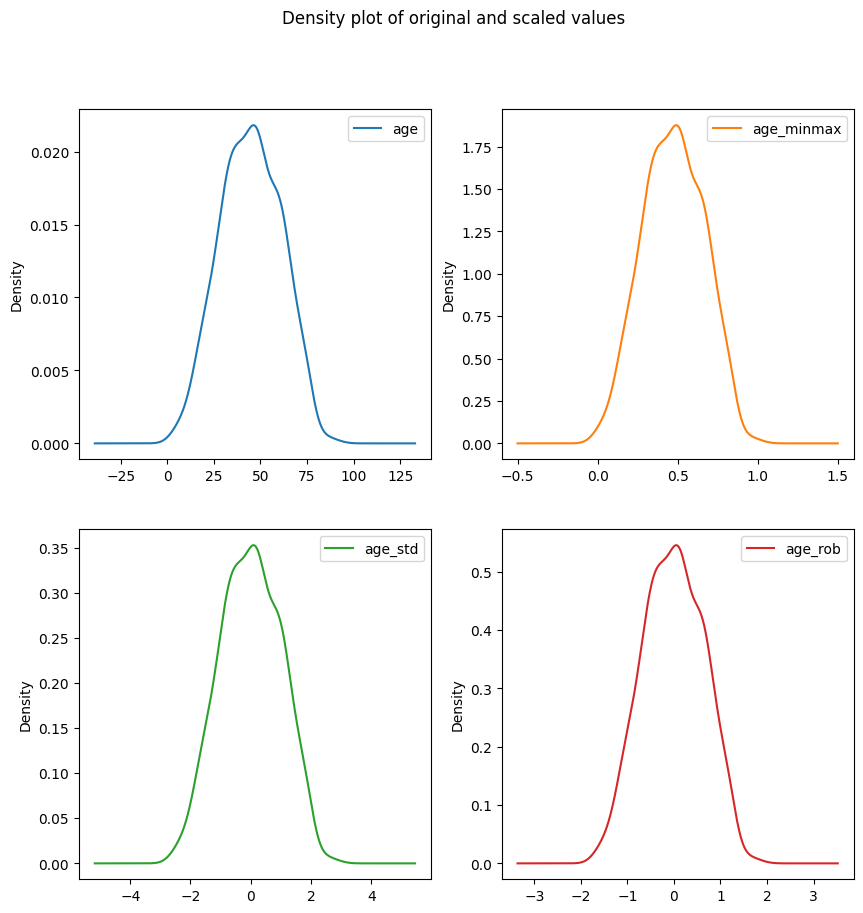

In [17]:
df_scaled.plot(kind='density', subplots=True, layout=(2,2), 
               sharex=False, figsize=(10,10), title='Density plot of original and scaled values')
plt.show()

# Conclusiones <a class="anchor" id="conclusiones"></a>
Como podemos observar en el eje de densidad, cada método de escalado numérico persigue su propia escala, siendo la más pequeña la del escalado estándar (StandardScaler) y la más alta la del Escalado Mínimo Máximo (MinMaxScaler). 

Los valores del eje x para el escalado mínimo máximo muestra que los datos estan comprendidos entre 0 y 1, posicionando la gran mayoria de los datos cerca del 0.5; mientras que en el escalado estándar y robusto (RobustScaler) van desde un valor negativo hasta un valor positivo, posicionando la gran mayoria de los datos cerca del 0.